#Titanic: *A Data-Driven Perspective of a Tragedy*

Here I’ll be telling you a story about the Titanic dataset, exploring insights about passenger survival on the Titanic. I'll walk you through how I calculated some key statistics, visualized the data, and made predictions to understand what factors influenced survival.

![Titanic](https://images.nationalgeographic.org/image/upload/t_edhub_resource_key_image/v1638882458/EducationHub/photos/titanic-sinking.jpg)

##Data Set chosen

Here we can see that the dataset extracted from GitHub has several features: passanger class, age, sex and whether the passenger survived.

In [14]:
import pandas as pd

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

# Show the first few rows
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Data Cleaning and Exploration

Here we will check for missing values and clean the data. We will also identify the mean and median of passengers' ages.

In [17]:
# Checking for missing values
data.isnull().sum()

# Filling missing age values with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Basic statistics
data.describe()


<ipython-input-17-85d4677afa5e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##Survival Rate

Now let's calculate how many passengers survived the ship's sinking.

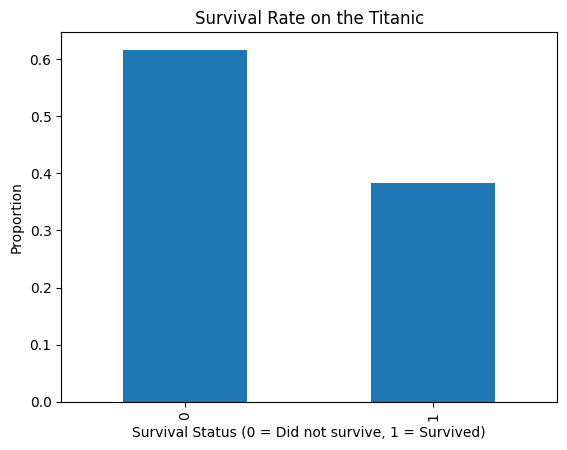

In [18]:
import matplotlib.pyplot as plt

# Survival rate
survival_rate = data['Survived'].value_counts(normalize=True)

# Plotting survival rate
survival_rate.plot(kind='bar', title='Survival Rate on the Titanic')
plt.xlabel('Survival Status (0 = Did not survive, 1 = Survived)')
plt.ylabel('Proportion')
plt.show()


As we can see above, out 891 passengers, around 38% survided the accident.  

Now let's dive a little a bit deeper to understand the survival rates by gender.

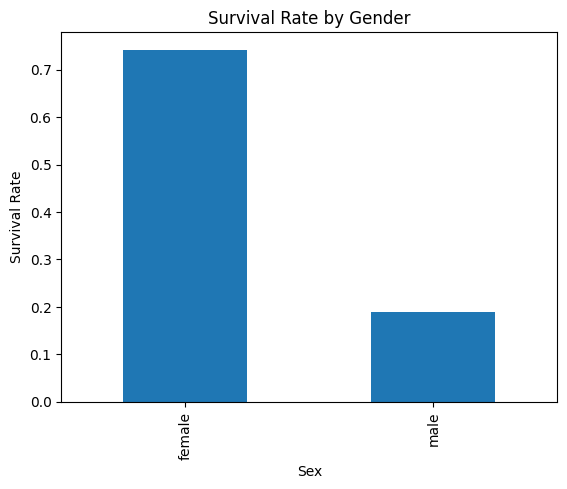

In [19]:
# Survival by gender
gender_survival = data.groupby('Sex')['Survived'].mean()

# Plotting survival by gender
gender_survival.plot(kind='bar', title='Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()


By looking at the chart above, we can see that women survived more than men.

The survival rate for women is **75%** whilist for men is only **20%**.

Let's take a look what is the survival rate by cabin class.

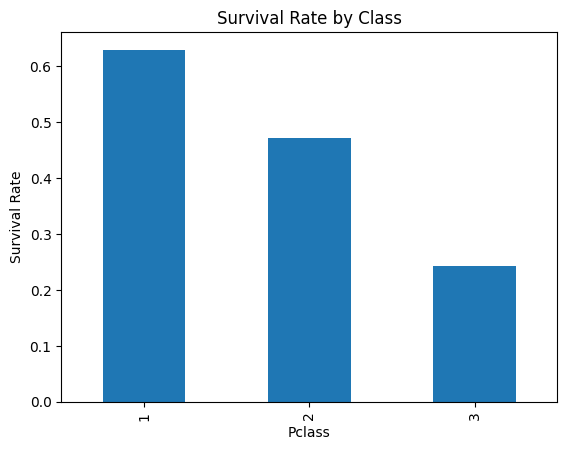

In [20]:
# Survival by class
class_survival = data.groupby('Pclass')['Survived'].mean()

# Plotting survival by class
class_survival.plot(kind='bar', title='Survival Rate by Class')
plt.ylabel('Survival Rate')
plt.show()


Here we can see that first-class passengers had the highest survival rate, followed by second-class, and then third-class passengers.

##Prediction: Logistic Regression

The prediction point is relevant because it demonstrates how machine learning models can use historical data to forecast outcomes. In this case, we predict survival on the Titanic based on features like sex, age, and class.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Selecting relevant features
features = ['Pclass', 'Sex', 'Age']
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Splitting data into train and test sets
X = data[features]
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')


Model Accuracy: 81.01%


![Jack and Rose](https://www.dga.org/-/media/Images/DGAQ-Article-Images/1401-Winter-2014/W14ShotTo5.ashx?la=en&hash=0D676DD881A5CA08B8A8D7F5247992935349C0FE)

## Conclusion

In summary, our exploration of the Titanic dataset revealed interesting patterns in survival rates by gender and class. Our prediction model showed that certain factors, like being female or a first-class passenger, significantly increased the chances of survival. This story not only gives us insights into the Titanic tragedy but also demonstrates how data analysis and machine learning can help us uncover patterns and make predictions.

##Reference

Data Science Dojo. (n.d.). Titanic dataset. Retrieved from https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning: with applications in R (1st ed.). Springer.

Raschka, S. (2015). Python machine learning. Packt Publishing.